Index DatetimeIndex(['2010-09-13', '2010-09-14', '2010-09-15', '2010-09-16',
               '2010-09-17', '2010-09-20', '2010-09-24', '2010-09-27',
               '2010-09-28', '2010-09-29',
               ...
               '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10',
               '2017-04-11', '2017-04-12'],
              dtype='datetime64[ns]', name='Date', length=1628, freq=None)


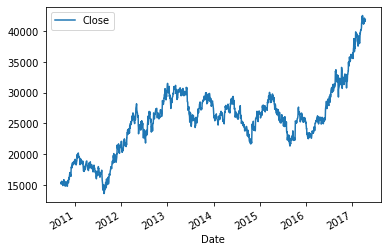

In [1]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import lag_plot
from datetime import datetime, timedelta
df = pd.read_csv("data.csv")
df.set_index('Date',inplace=True)
df.index=pd.to_datetime(df.index)
print('Index', df.index)

#drop data from 2010 to 2014 as they are too old
#dates = pd.date_range(datetime(2010,9,13),datetime(2015,7,13),freq='d')
#old = []
#for date in dates:
    #old.append(str(date.date()))
#df = df.drop(index=old, errors='ignore')
data = df.drop(columns=["Open", "High", "Low", "Volume"])
data.plot()
num_predictions = 1086

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df['Close'], model='multiplicative', period=1)
#x = decomposed.plot()
decomposed = seasonal_decompose(df['Close'], model='additive', period=1)
#x = decomposed.plot()

df['Stationary'] = df['Close'].diff() #difference with previous row
df.dropna(inplace=True)


In [61]:
from datetime import datetime
from math import sqrt
import sklearn
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

#Autoregression Model (AR)
data = df['Stationary']

#train:test will be 80:20
percent = (len(data)//10)*5
train, test = data[0:percent], data[percent:]

#train model
model = AutoReg(train, lags=1)
model_fit = model.fit()
print(model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
p = []
t = []

for item in predictions:
    p.append(item)
for item in test:
    t.append(item)
    
#for i in range(len(predictions)):
    #print('predicted=%f, expected=%f' % (p[i], t[i]))
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
AR_predict = model_fit.predict(start=len(train)+len(test), end=len(train)+len(test)+num_predictions, dynamic=False)
#pyplot.plot(t)
#pyplot.plot(p, color='red')
#pyplot.show()

intercept        15.370447
Stationary.L1     0.021056
dtype: float64
Test RMSE: 449.197


/usr/local/Cellar/jupyterlab/3.1.4/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/Cellar/jupyterlab/3.1.4/libexec/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.1.4/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/Cellar/jupyterlab/3.1.4/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueW

In [62]:
#AutoRegression Moving Average Model (ARIMA)

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
data = df['Stationary']

#train:test will be 80:20
percent = (len(data)//10)*5
train, test = data[0:percent], data[percent:]


# fit model
model = ARIMA(train, order=(1, 1, 5))
model_fit = model.fit()
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
p2 = []
for item in predictions:
    p2.append(item)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
ARIMA_predict = model_fit.predict(start=len(train)+len(test), end=len(train)+len(test)+num_predictions)
#pyplot.plot(t)
#pyplot.plot(p2, color='red')
#pyplot.show()

/usr/local/Cellar/jupyterlab/3.1.4/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/Cellar/jupyterlab/3.1.4/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/Cellar/jupyterlab/3.1.4/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Test RMSE: 449.124


/usr/local/Cellar/jupyterlab/3.1.4/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/usr/local/Cellar/jupyterlab/3.1.4/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


rmse:  3632.848180231775
new rmse:  3602.2991537211033
diff:  30.549026510671865


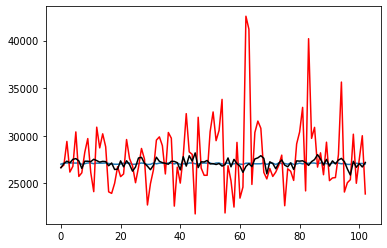

In [105]:
#using sklearn svm

from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVR

shift = 600
df['Prediction'] = df['Close'].shift(-shift)
X = np.vstack(df['Close'])
X = X[:-shift]
y = np.array(df['Prediction'])
y = y[:-shift]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

svr = SVR()
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)
rmse = sqrt(mean_squared_error(y_test,predictions))
print('rmse: ', rmse)
pyplot.plot(predictions)
pyplot.plot(y_test, color='red')

from sklearn.metrics import make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],\
               'C': [1, 10, 100, 1000, 10000]}]
svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 35, scoring=scorer)
svr_gs.fit(x_train, y_train)
new = svr_gs.predict(x_test)
newrmse = sqrt(mean_squared_error(y_test,new))
print('new rmse: ', newrmse)
print('diff: ', rmse-newrmse)
pyplot.plot(new, color='black')


15.551115


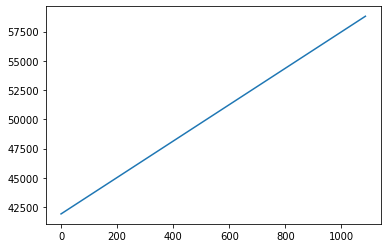

In [64]:
#to obtain final forecasting, average AR and ARIMA stationary data
AR_predict = np.array(AR_predict)
ARIMA_predict = np.array(ARIMA_predict)
combined_avg = []
for i in range(len(AR_predict)):
    avg = round(((AR_predict[i] + ARIMA_predict[i])/2), 6)
    combined_avg.append(avg)
predicted = []
#based on most recent data, add each stationary data to obtain next day's value
last = float(df['Close'].iloc[-1])
for avg in combined_avg:
    last+=avg 
    predicted.append(last)
    
pyplot.plot(predicted)

In [79]:
#write to csv
import csv

with open('sample_submission1.csv', 'w') as f:
    writer = csv.writer(f)
    for prediction in final:
        writer.writerow([prediction])


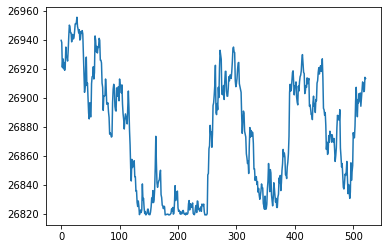

In [94]:
#using svr
#continuously predict based on new predictions

#x values <shift> periods before actual prediction
actual = X[-shift:]
actual_predict = svr.predict(actual)
all = []
while len(all)<522:
    for i in actual_predict:
        all.append(i)
    actual_predict = svr.predict(np.vstack(actual_predict))

all = all[:522]
#use svr fluctuations and combine with ar and arima
final = []
for p, a in zip(predicted,all):
    final.append((p+a)-26000)

pyplot.plot(all)